In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [15]:
def string_to_list(s):
    if pd.isna(s):
        return set()
    else:
        return sorted(list(set(s.split(','))))
    
def concatenate_elements(lst):
    return ','.join(lst)

In [16]:
df = pd.read_csv("../sandbox/PyR0_Ranked_Strains.tsv", sep="\t")
df['mutations'] = df['mutations'].apply(string_to_list)
df['mutations'] = df['mutations'].apply(concatenate_elements)
df["group"] = df['strain'].apply(lambda x: x[0] if x else None)

df.rename(columns={"Run date": "Run_Date"},
            inplace=True)
df["Run_Date"] = pd.to_datetime(df["Run_Date"])

df.head()

,rank,strain,mean/stddev,log10(P(R > R_A)),R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,confirmed cases / day,confirmed cases total,birthday,mutations,Run_Date,group
0,1,BL.1,578.697,72723.6,20.0137,19.8236,20.2056,1660.8200,1894420.0,2022-07-27,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B
1,2,BA.5.2.6,592.151,76144.3,18.9077,18.7358,19.0813,2158.2500,220573.0,2022-06-07,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20...",2021-03-12,B
2,3,BA.5.2.13,686.311,102284.0,18.9039,18.7555,19.0536,252.6900,119299.0,2022-07-17,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20...",2021-03-12,B
3,4,BQ.1.1,749.090,121852.0,18.6458,18.5122,18.7802,14.5804,54999.8,2022-08-24,"E:T9I,M:A63T,M:D3N,M:Q19E,N:E136D,N:G204R,N:P1...",2021-03-12,B
4,5,BA.2.75.2,444.675,42940.8,18.5953,18.3717,18.8216,1344.0700,121054.0,2022-08-01,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B


In [17]:
sorted(df[df["strain"].str.startswith("J")]["strain"].unique())

['JA.1',
 'JB.1',
 'JB.1.1',
 'JB.2',
 'JB.2.1',
 'JC.1',
 'JC.2',
 'JC.3',
 'JC.4',
 'JC.5',
 'JC.5.1',
 'JC.6',
 'JD.1',
 'JD.1.1',
 'JD.1.1.1',
 'JD.1.1.2',
 'JD.1.1.3',
 'JD.1.1.4',
 'JD.1.1.5',
 'JD.1.1.6',
 'JD.1.1.7',
 'JD.1.1.8',
 'JD.1.2',
 'JD.1.2.1',
 'JD.1.2.2',
 'JD.2',
 'JD.2.1',
 'JE.1',
 'JE.1.1',
 'JE.1.1.1',
 'JF.1',
 'JF.1.1',
 'JF.1.1.1',
 'JF.1.1.2',
 'JF.2',
 'JF.3',
 'JF.4',
 'JG.1',
 'JG.2',
 'JG.3',
 'JG.3.1',
 'JG.3.2',
 'JG.3.3',
 'JG.3.4',
 'JG.4',
 'JH.1',
 'JH.2',
 'JJ.1',
 'JK.1',
 'JL.1',
 'JM.1',
 'JM.2',
 'JN.1',
 'JN.1.1',
 'JN.1.1.1',
 'JN.1.1.2',
 'JN.1.1.3',
 'JN.1.10',
 'JN.1.11',
 'JN.1.11.1',
 'JN.1.12',
 'JN.1.2',
 'JN.1.3',
 'JN.1.4',
 'JN.1.5',
 'JN.1.6',
 'JN.1.6.1',
 'JN.1.7',
 'JN.1.8',
 'JN.1.8.1',
 'JN.1.9',
 'JN.10',
 'JN.11',
 'JN.12',
 'JN.2',
 'JN.2.1',
 'JN.2.2',
 'JN.2.3',
 'JN.2.4',
 'JN.2.5',
 'JN.3',
 'JN.3.1',
 'JN.3.2',
 'JN.3.2.1',
 'JN.4',
 'JN.5',
 'JN.5.1',
 'JN.6',
 'JN.7',
 'JN.8',
 'JN.9',
 'JP.1',
 'JP.1.1',
 'JQ.1',
 

In [18]:
mutations_list = df[["strain", "mutations"]][(df["mutations"]!="")].drop_duplicates(keep="first").sort_values(by="strain")
mutations_list["mutations"] = df["mutations"].apply(string_to_list)
mutations_dict = dict(zip(mutations_list["strain"], mutations_list["mutations"]))

for key, value in mutations_dict.items():
    # Remove the stuff before the colon and the colon for each value in the list
    mutations_dict[key] = [entry.split(':')[1] for entry in value]
    
ba287 = ["H69del", "R190S", "L24del", "S373P", "N969K", "H655Y", "Q954H", "D138del", "L18del", "N501Y", "P25del", "N460K", "F140del",
         "H146del", "G75D", "V143del", "T19del", "G142del", "Q23del", "V126A", "R408S", "D936G", "P621S", "S375F", "Q498R", "T20del",
         "V642G", "E484A", "P26del", "T791I", "Y145del", "D614G", "V213G", "A27S", "S98F", "N440K", "V16del", "N17del", "D796H", "N679R",
         "T22del", "Y505H", "C15del", "R21del", "N481K", "S371F", "T376A", "K417T", "G339D", "V445G", "P681H", "Y144del", "D405N", "L452M",
         "D215G", "N137del", "S477N", "C136del", "K444N", "V70del", "W152L", "P139del", "L141del", "S691P", "N764K", "R634H", "F157L"]

for key, value in mutations_dict.items():
    # Find mutations that intersect with variant_ba_mutations
    intersection_mutations = [mutation for mutation in value if mutation in ba287]
    # Count the number of mutations in the intersection
    intersect_count = len(intersection_mutations)
    # Add the intersection mutations to the dictionary value
    mutations_dict[key] = {'mutations': value, 'intersection_count': intersect_count, 'intersection_mutations': intersection_mutations}

strains_with_intersection = {key: value for key, value in mutations_dict.items() if key in ["BA.2", "BA.2.86", "JN.1", "HV.1", "HK.3", "XBB.1"]}

strains_with_intersection_sorted = dict(sorted(strains_with_intersection.items(), key=lambda x: x[1]['intersection_count'], reverse=True))

In [19]:
strains_with_intersection_sorted_df = pd.DataFrame.from_dict(strains_with_intersection_sorted, orient='index')

strains_with_intersection_sorted_df.to_excel('../results/ba287_intersections.xlsx', index=True)


mutations = set(m for sublist in strains_with_intersection_sorted_df['intersection_mutations'] for m in sublist)

# Create a column for each mutation
for mutation in mutations:
    strains_with_intersection_sorted_df[mutation] = strains_with_intersection_sorted_df['intersection_mutations'].apply(lambda x: 1 if mutation in x else 0)

# Drop the original 'Mutations' column
strains_with_intersection_sorted_df.drop(columns=['mutations', 'intersection_count', 'intersection_mutations'], inplace=True)

strains_with_intersection_sorted_df


,T376A,E484A,N481K,D614G,P681H,Q498R,S477N,F157L,S371F,H655Y,...,N764K,S375F,N460K,P621S,Y505H,G339D,V213G,R408S,S373P,N501Y
BA.2,1,1,0,1,1,1,1,0,1,1,...,1,1,0,0,1,1,1,1,1,1
BA.2.86,1,0,1,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
HV.1,1,1,0,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,1
JN.1,1,0,1,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
HK.3,1,1,0,1,1,1,1,0,1,1,...,1,1,1,0,1,0,0,1,1,1
XBB.1,1,1,0,1,1,1,1,0,1,1,...,1,1,1,0,1,0,0,1,1,1


Text(0.5, 1.0, 'Presence of BA.2.87 Mutations in Existing Variants')

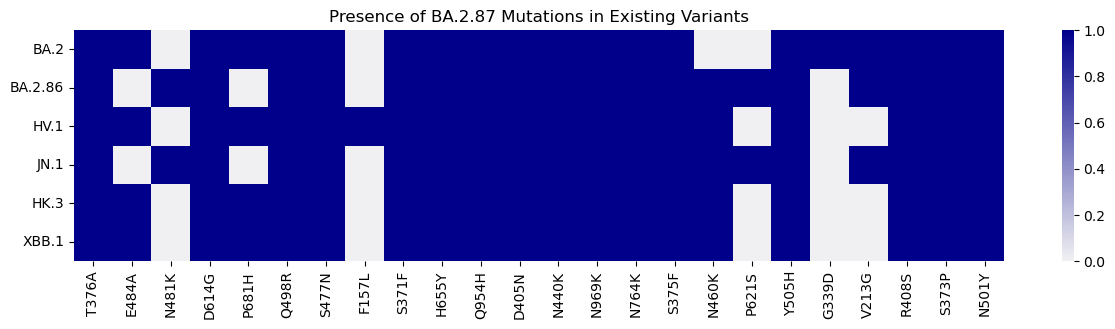

In [20]:
fig, ax = plt.subplots(figsize=(15,3))

sns.heatmap(strains_with_intersection_sorted_df,
            cmap=sns.light_palette("darkblue", as_cmap=True),
            ax=ax)

ax.set_title("Presence of BA.2.87 Mutations in Existing Variants")

In [21]:
strain_biology = df[["strain", "group", "mutations"]][(df["mutations"]!="")].drop_duplicates(keep="first").sort_values(by="strain")

unique_mutations = sorted(list(set(','.join(df['mutations'].dropna()).split(','))))
unique_mutations.remove("")

for mutation in unique_mutations:
    strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)

# Drop the original "mutations" column if needed
strain_biology = strain_biology.drop(['mutations'], axis=1)

strain_biology = strain_biology.set_index("strain")
# Display the updated DataFrame
strain_biology.head()

/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_3315/3653137785.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)
/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_3315/3653137785.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)
/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_3315/3653137785

,group,E:D72G,E:E8D,E:F20L,E:F26L,E:L18I,E:L21F,E:L21I,E:L51I,E:L73F,...,S:Y248D,S:Y248H,S:Y248N,S:Y248S,S:Y28H,S:Y449H,S:Y449N,S:Y451H,S:Y453F,S:Y505H
strain,,,,,,,,,,,,,,,,,,,,,
A,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.11,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.12,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.15,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
group = strain_biology["group"]
lut = dict(zip(group.unique(),sns.color_palette("hls",len(group.unique())).as_hex()))
row_colors = group.map(lut)

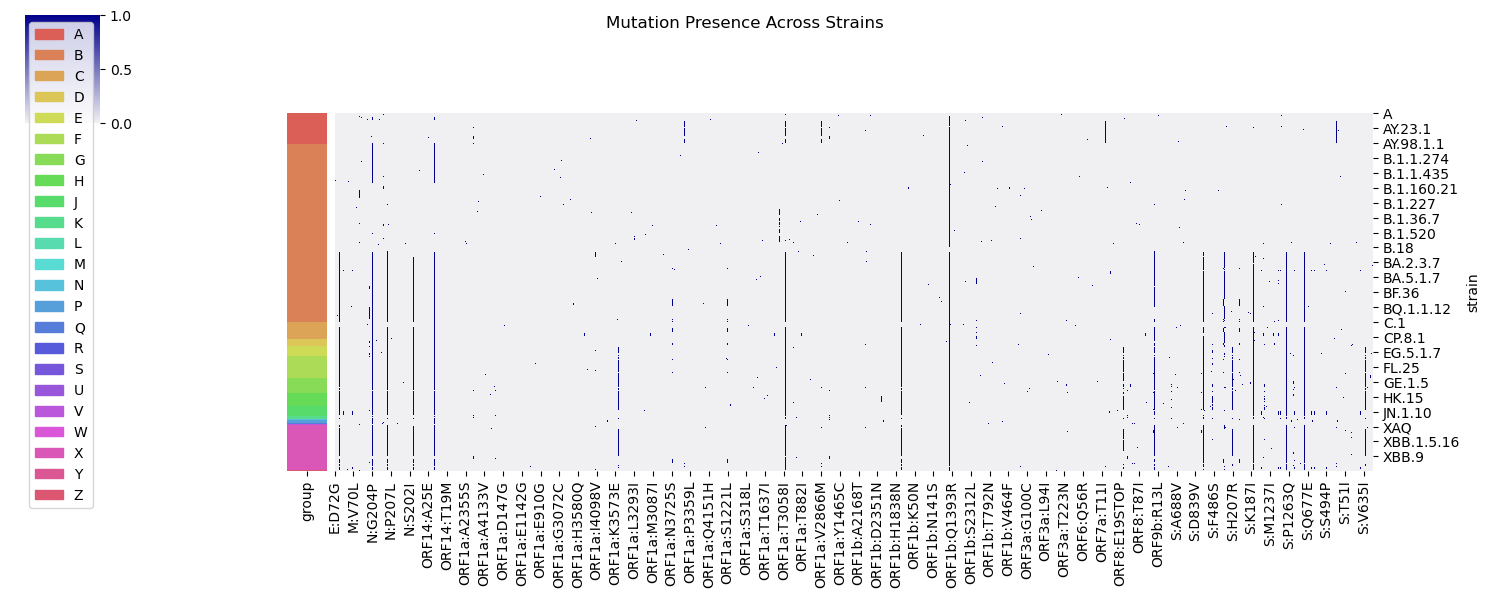

In [23]:
sns.clustermap(strain_biology[unique_mutations],
            row_colors=row_colors,
            row_cluster=False,
            col_cluster=False,
           cmap=sns.light_palette("darkblue", as_cmap=True),
           figsize=(15,6),
           ).fig.suptitle("Mutation Presence Across Strains")

patchList = []
for key in lut:
        data_key = mpatches.Patch(color=lut[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

Something is broken with case counts here...

In [24]:
df["confirmed_cases_total_group"] = df.groupby(["Run_Date", "group"])["confirmed cases total"].transform("sum")
df

,rank,strain,mean/stddev,log10(P(R > R_A)),R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,confirmed cases / day,confirmed cases total,birthday,mutations,Run_Date,group,confirmed_cases_total_group
0,1,BL.1,578.697000,72723.600000,20.013700,19.823600,20.20560,1660.8200,1894420.0,2022-07-27,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.552775e+09
1,2,BA.5.2.6,592.151000,76144.300000,18.907700,18.735800,19.08130,2158.2500,220573.0,2022-06-07,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20...",2021-03-12,B,7.552775e+09
2,3,BA.5.2.13,686.311000,102284.000000,18.903900,18.755500,19.05360,252.6900,119299.0,2022-07-17,"E:T9I,M:A63T,M:D3N,M:Q19E,N:G204R,N:P13L,N:R20...",2021-03-12,B,7.552775e+09
3,4,BQ.1.1,749.090000,121852.000000,18.645800,18.512200,18.78020,14.5804,54999.8,2022-08-24,"E:T9I,M:A63T,M:D3N,M:Q19E,N:E136D,N:G204R,N:P1...",2021-03-12,B,7.552775e+09
4,5,BA.2.75.2,444.675000,42940.800000,18.595300,18.371700,18.82160,1344.0700,121054.0,2022-08-01,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.552775e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126559,3749,B.33,-0.246220,-0.171109,1.004370,0.524990,1.92150,0.0000,299156.0,2020-02-29,ORF3a:G251V,NaT,B,NaN
126560,3750,A,-0.286401,-0.199227,1.000000,0.555665,1.79965,0.0000,3363330.0,2019-12-30,ORF8:L84S,NaT,A,NaN
126561,3751,B,-0.334788,-0.233204,0.998692,0.599513,1.66366,0.0000,29293600.0,2019-12-30,,NaT,B,NaN
126562,3752,B.1.1,-0.327242,-0.227896,0.917617,0.327860,2.56823,0.0000,191594000.0,2020-02-26,"N:G204R,N:R203K,ORF14:G50N,ORF1b:P314L,S:D614G",NaT,B,NaN


<Axes: xlabel='Run_Date', ylabel='confirmed_cases_total_group'>

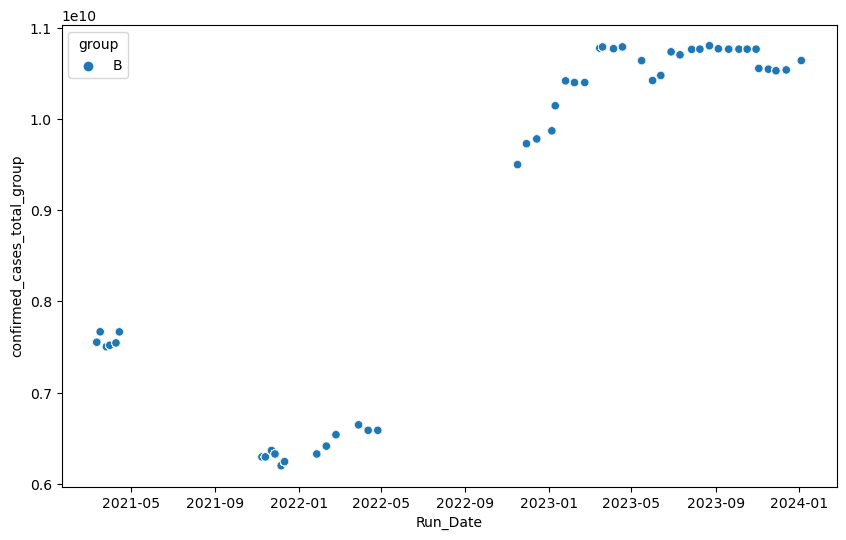

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df[df["group"]=="B"],
                x="Run_Date",
                y="confirmed_cases_total_group",
                hue="group",
                legend=True)